# Tools

In [4]:
import h5py, numpy as np, tqdm, os, glob
from matplotlib import pyplot as plt

In [19]:
import matplotlib
matplotlib.rc('font', size=18, family='serif')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [6]:
# %matplotlib widget
%matplotlib inline

In [26]:
def G(zeta):
    zeta2 = zeta*zeta
    return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))

In [27]:
wl = 3.75e-10

# Load data

In [11]:
x_sample5, lnVs_over_V0_sample5 = np.loadtxt("lnVs_over_V0-sample5.dat").T
x_sample6, lnVs_over_V0_sample6 = np.loadtxt("lnVs_over_V0-sample6.dat").T
x_mix, lnVs_over_V0_mix = np.loadtxt("lnVs_over_V0-mixture.dat").T
x_stack, lnVs_over_V0_stacked = np.loadtxt("lnVs_over_V0-stacked.dat").T

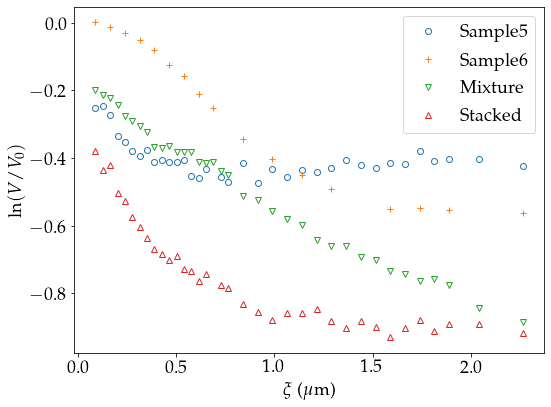

In [88]:
plt.figure(figsize=(8,6))
plt.plot(x_sample5, lnVs_over_V0_sample5, 'o', mfc='none', label='Sample5')
plt.plot(x_sample6, lnVs_over_V0_sample6, '+', mfc='none', label='Sample6')
plt.plot(x_mix, lnVs_over_V0_mix, 'v', mfc='none', label='Mixture')
plt.plot(x_stack, lnVs_over_V0_stacked, '^', mfc='none', label='Stacked')
plt.xlabel(r'$\xi$ ($\mu$m)')
plt.ylabel('$\ln(V/V_0)$')
plt.legend()
plt.tight_layout()

# Sample 6

/tmp/ipykernel_3923074/2097248867.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))


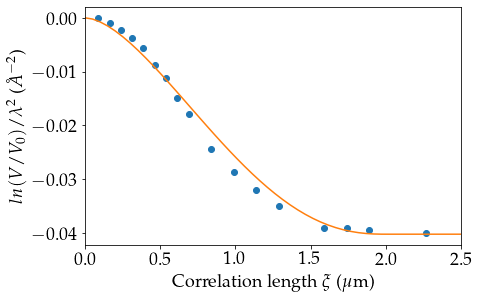

In [49]:
t = 3.1e-3
r = 1e-6
phi = 0.117
delta_rho = 129e12

plt.figure(figsize=(7,4.5))
plt.plot(x_sample6, lnVs_over_V0_sample6/wl/wl*1e-20, 'o')

xprime = np.linspace(0.001, 5, 100)*1e-6
G1 = G(xprime/r)
G1[G1!=G1]=0
xp_sample6, yp_sample6 = xprime*1e6, (2/3.)*phi*delta_rho*delta_rho*t*1e-20*r*(G1-1)
plt.plot(xp_sample6, yp_sample6)
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 2.5)
# plt.ylim(None, 0)
plt.tight_layout()

# Sample 5

/tmp/ipykernel_3923074/2097248867.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))


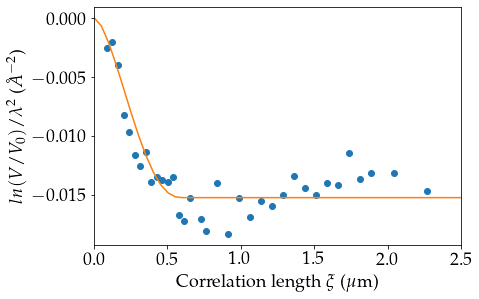

In [50]:
t = 3.9e-3
r = .3e-6
phi = 0.117
delta_rho = 129e12

plt.figure(figsize=(7,4.5))
plt.plot(x_sample5, lnVs_over_V0_sample5/wl/wl*1e-20 + 0.0155, 'o')

xprime = np.linspace(0.001, 5, 100)*1e-6
G1 = G(xprime/r)
G1[G1!=G1]=0
xp_sample5, yp_sample5 = xprime*1e6, (2/3.)*phi*delta_rho*delta_rho*t*1e-20*r*(G1-1)
plt.plot(xp_sample5, yp_sample5)
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 2.5)
# plt.ylim(None, 0)
plt.tight_layout()

# Mixture

/tmp/ipykernel_3923074/2097248867.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))


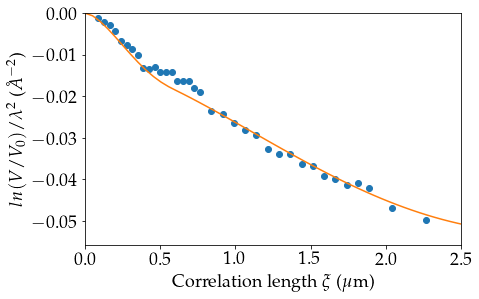

In [51]:
r1 = 0.3e-6
r2 = 1.6e-6
t=0.005

plt.figure(figsize=(7,4.5))
plt.plot(x_mix, lnVs_over_V0_mix/wl/wl*1e-20 +0.013, 'o')

xprime = np.linspace(0.001, 5, 100)*1e-6
G1 = G(xprime/r1)
G1[G1!=G1]=0
G2 = G(xprime/r2)
G2[G2!=G2]=0
w = 0.6

xp_mix, yp_mix = xprime*1e6, (2/3.)*phi*delta_rho*delta_rho*t*1e-20*(w*r*(G1-1)+(1-w)*r2*(G2-1))
plt.plot(xp_mix, yp_mix)
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 2.5)
plt.ylim(None, 0)
plt.tight_layout()

# Stacked

/tmp/ipykernel_3923074/2097248867.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))


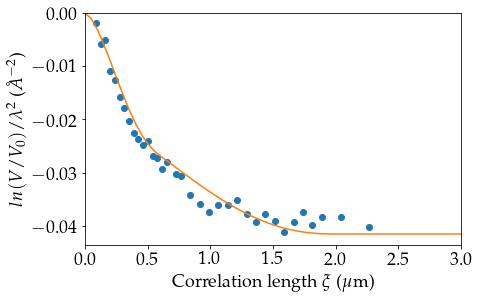

In [52]:
t1 = 5e-3
r1 = 0.3e-6
t2 = 1.7e-3
r2 = 1.e-6

plt.figure(figsize=(7,4.5))
plt.plot(x_stack, lnVs_over_V0_stacked/wl/wl*1e-20+0.025, 'o')

xprime = np.linspace(0.001, 5, 100)*1e-6
G1 = G(xprime/r1)
G1[G1!=G1]=0
G2 = G(xprime/r2)
G2[G2!=G2]=0

xp_stacked, yp_stacked = xprime*1e6, (2/3.)*phi*delta_rho*delta_rho*1e-20*(t1*r1*(G1-1)+t2*r2*(G2-1))
plt.plot(xp_stacked, yp_stacked)
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 3)
plt.ylim(None, 0)
plt.tight_layout()

# All

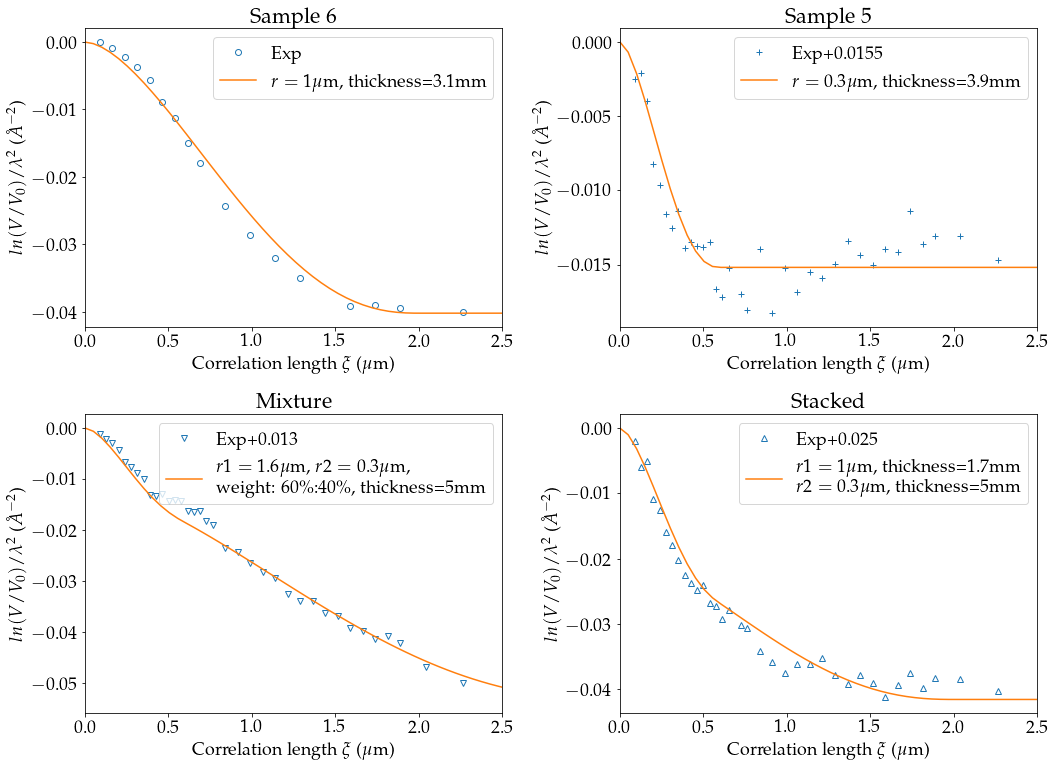

In [83]:
fig, axes = plt.subplots(2,2, figsize=(15, 11))

axes[0,0].set_title("Sample 6")
axes[0,1].set_title("Sample 5")
axes[1,0].set_title("Mixture")
axes[1,1].set_title("Stacked")
axes[0,0].plot(x_sample6, lnVs_over_V0_sample6/wl/wl*1e-20, 'o', mfc='none', label='Exp')
axes[0,1].plot(x_sample5, lnVs_over_V0_sample5/wl/wl*1e-20 + 0.0155, '+', mfc='none', label='Exp+0.0155')
axes[1,0].plot(x_mix, lnVs_over_V0_mix/wl/wl*1e-20 +0.013, 'v', mfc='none', label='Exp+0.013')
axes[1,1].plot(x_stack, lnVs_over_V0_stacked/wl/wl*1e-20+0.025, '^', mfc='none', label='Exp+0.025')

axes[0,0].plot(xp_sample6, yp_sample6, label=r"$r=1\mu$m, thickness=3.1mm")
axes[0,1].plot(xp_sample5, yp_sample5, label=r"$r=0.3\mu$m, thickness=3.9mm")
axes[1,0].plot(xp_mix, yp_mix, label=r"$r1=1.6\mu$m, $r2=0.3\mu$m,"+"\n"+"weight: 60\%:40\%, thickness=5mm")
axes[1,1].plot(xp_stacked, yp_stacked, label=r"$r1=1\mu$m, thickness=1.7mm"+"\n"+"$r2=0.3\mu$m, thickness=5mm")

for i in range(2):
    for j in range(2):
        axes[i,j].legend()
        axes[i,j].set_xlim(0,2.5)
        axes[i,j].set_xlabel(r'Correlation length $\xi$ ($\mu$m)')
        axes[i,j].set_ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')

plt.tight_layout()